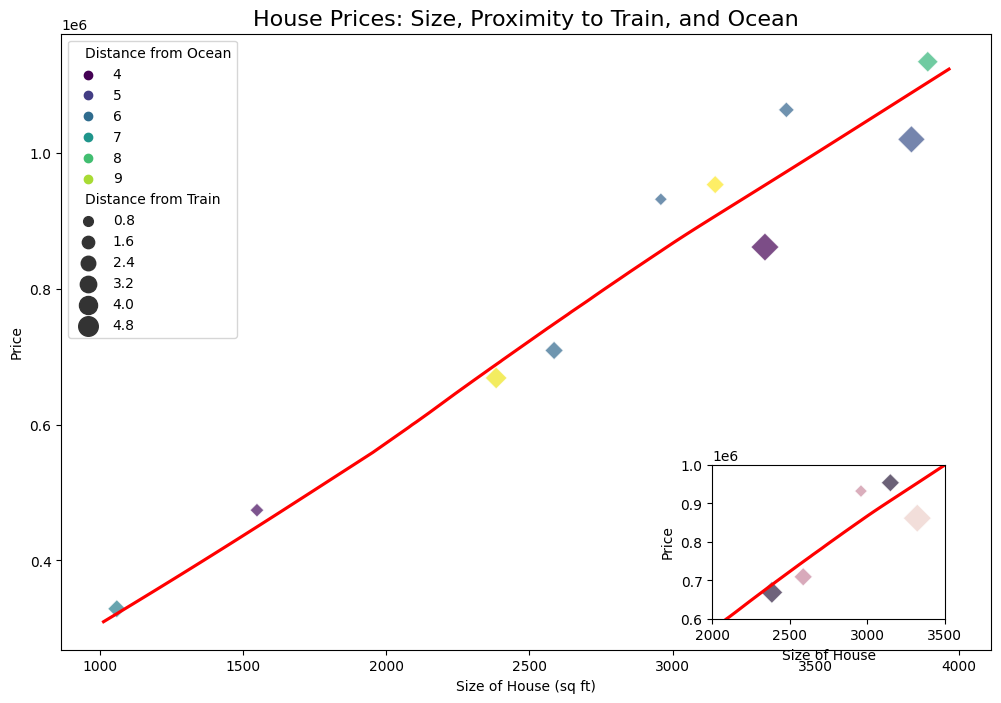

In [1]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


np.random.seed(0)
size_of_house = np.random.uniform(1000, 4000, 100)  # Size in square feet
price = size_of_house * np.random.uniform(150, 350) + np.random.normal(0, 50000, 100)  # Price
distance_from_train = np.random.uniform(0.5, 5, 100)  # Distance from train in miles
distance_from_ocean = np.random.uniform(0.1, 10, 100)  # Distance from ocean in miles


df = pd.DataFrame({
    'Size of House': size_of_house,
    'Price': price,
    'Distance from Train': distance_from_train,
    'Distance from Ocean': distance_from_ocean
})

# Sample 10 points for a less cluttered plot
sampled_df = df.sample(10)



# Adjusting the inset to capture the part of the original regression line that falls within the bounds

# Creating the scatter plot again with enlarged axes
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
    x='Size of House',
    y='Price',
    size='Distance from Train',
    sizes=(40, 200),
    palette='viridis',
    hue='Distance from Ocean',
    data=sampled_df,
    alpha=0.7,
    marker='D'
)

# Adding a smoother line for the average trend (using lowess)
sns.regplot(
    x='Size of House', 
    y='Price', 
    data=df,  # Using the entire dataset for the trend line
    scatter=False,  # No additional scatter points
    color='red', 
    ax=ax,  # Plotting on the same axes
    lowess=True,  # Using a locally weighted scatterplot smoother
    label='Trend Line'
)

# Setting title and labels
plt.title('House Prices: Size, Proximity to Train, and Ocean', fontsize=16)
plt.xlabel('Size of House (sq ft)')
plt.ylabel('Price')

# Adding the inset plot 
# Filtering sampled data for the inset plot
#inset_data = sampled_df[(sampled_df['Size of House'] >= 2000) & (sampled_df['Size of House'] <= 3000) & (sampled_df['Price'] >= 250000) & (sampled_df['Price'] <= 600000)]
inset_data=sampled_df
inset_ax = ax.inset_axes([0.7, 0.05, 0.25, 0.25])  # Inset axes 

# Scatter plot in the inset with filtered sampled data
sns.scatterplot(data=inset_data, x='Size of House', y='Price', ax=inset_ax, size='Distance from Train', sizes=(40, 200), hue='Distance from Ocean', alpha=0.7, marker='D', legend=False)

# Capturing the part of the original regression line that falls within the bounds
sns.regplot(
    x='Size of House', 
    y='Price', 
    data=df,  # Using the entire dataset for the trend line
    scatter=False, 
    
    color='red', 
    ax=inset_ax, 
    lowess=True,
    truncate=True  # Truncating the line within the limits of the inset axes
)

# Adjusting the limits of the inset axes
inset_ax.set_xlim(2000, 3500)
inset_ax.set_ylim(600000, 1000000)

# Display the plot
plt.show()


